<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Sentiment_Analysis_using_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
nltk.download('stopwords')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving Demo1 clean.csv to Demo1 clean (1).csv


In [48]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['Demo1 clean.csv']))

In [49]:
data.head()

,Unnamed: 0,Hotel_id,Hotel,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment
0,0,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Best romantic vacation ever!!!!,Paula,Our experience at Rancho Valencia was absolute...,experience rancho valencia absolutely perfect ...,5,"['experience', 'rancho', 'valencia', 'absolute...",Positive
1,1,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Sweet sweet serenity,D,Amazing place. Everyone was extremely warm and...,amazing place everyone extremely warm welcomin...,5,"['amazing', 'place', 'everyone', 'extremely', ...",Positive
2,2,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Amazing Property and Experience,Ron,We booked a 3 night stay at Rancho Valencia to...,booked 3 night stay rancho valencia play tenni...,5,"['booked', '3', 'night', 'stay', 'rancho', 'va...",Positive
3,3,AVwdOclqIN2L1WUfti38,Aloft Arundel Mills,"Never again...beware, if you want sleep.",jaeem2016,Currently in bed writing this for the past hr ...,currently bed writing past hr 12 dogs barking ...,2,"['currently', 'bed', 'writing', 'past', 'hr', ...",Negative
4,4,AVwdOclqIN2L1WUfti38,Aloft Arundel Mills,ALWAYS GREAT STAY...,MamaNiaOne,I live in Md and the Aloft is my Home away fro...,live md aloft home away homewe stayed 1 night ...,5,"['live', 'md', 'aloft', 'home', 'away', 'homew...",Positive


In [50]:
data.Text_Clean=data.Text_Clean.astype(str)


In [51]:
X = data['Text_Clean']
y = data['Sentiment']

In [52]:
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))

In [53]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [54]:
data['Text_Clean'][:5]


0    experience rancho valencia absolutely perfect ...
1    amazing place everyone extremely warm welcomin...
2    booked 3 night stay rancho valencia play tenni...
3    currently bed writing past hr 12 dogs barking ...
4    live md aloft home away homewe stayed 1 night ...
Name: Text_Clean, dtype: object

In [55]:

from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 19663 unique tokens. 


In [56]:
max([max(sequence) for sequence in sequences])


19663

In [57]:
# Each number is the index of the word in the order of word in original text
sequences[0]

[58, 5356, 4107, 420, 74, 1384, 350, 223, 373, 158, 14, 13, 162, 32, 799, 694]

In [58]:
word_index


{'hotel': 1,
 'room': 2,
 'staff': 3,
 'stay': 4,
 'good': 5,
 'great': 6,
 'clean': 7,
 'breakfast': 8,
 'nice': 9,
 'rooms': 10,
 'friendly': 11,
 'location': 12,
 'would': 13,
 'stayed': 14,
 'comfortable': 15,
 'us': 16,
 'one': 17,
 'time': 18,
 'place': 19,
 'night': 20,
 'service': 21,
 'area': 22,
 'helpful': 23,
 'desk': 24,
 'well': 25,
 'bad': 26,
 'front': 27,
 'bed': 28,
 'get': 29,
 'pool': 30,
 'like': 31,
 'back': 32,
 'could': 33,
 'also': 34,
 'really': 35,
 'free': 36,
 'close': 37,
 'everything': 38,
 'parking': 39,
 'next': 40,
 'best': 41,
 'day': 42,
 'didnt': 43,
 'check': 44,
 'price': 45,
 'small': 46,
 'even': 47,
 'little': 48,
 'excellent': 49,
 'first': 50,
 'right': 51,
 'food': 52,
 'bathroom': 53,
 'beds': 54,
 'two': 55,
 'new': 56,
 'always': 57,
 'experience': 58,
 '2': 59,
 'much': 60,
 'family': 61,
 'definitely': 62,
 'made': 63,
 'restaurants': 64,
 'floor': 65,
 'go': 66,
 'enjoyed': 67,
 'recommend': 68,
 'hotels': 69,
 'got': 70,
 'quiet': 71,

In [59]:

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [60]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [61]:
print(sequences[0])


[58, 5356, 4107, 420, 74, 1384, 350, 223, 373, 158, 14, 13, 162, 32, 799, 694]


In [62]:
word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(2719328, 3074420)

In [78]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['feel', 'good', 'hotel', 'cheap', 'junk', 'bad', 'great','price','love']}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'bad': ['okay', 'either', 'ok', 'terrible', 'horrible'],
 'cheap': ['thats', 'low', 'budget', 'fancy', 'isnt'],
 'feel': ['johnnie', 'home', 'quirky', 'marjean', 'viewed'],
 'good': ['decent', 'liked', 'adequate', 'great', 'nice'],
 'great': ['excellent', 'awesome', 'perfect', 'wonderful', 'fantastic'],
 'hotel': ['property', 'motel', 'sacrifice', 'accommodation', 'bader'],
 'junk': ['filling', 'miniscule', 'omelette', 'drawback', '630'],
 'love': ['enjoy', 'loungedear', 'charlesmark', 'relaxing', 'peacefulmahalo'],
 'price': ['value', 'rates', 'rate', 'considering', 'budget']}

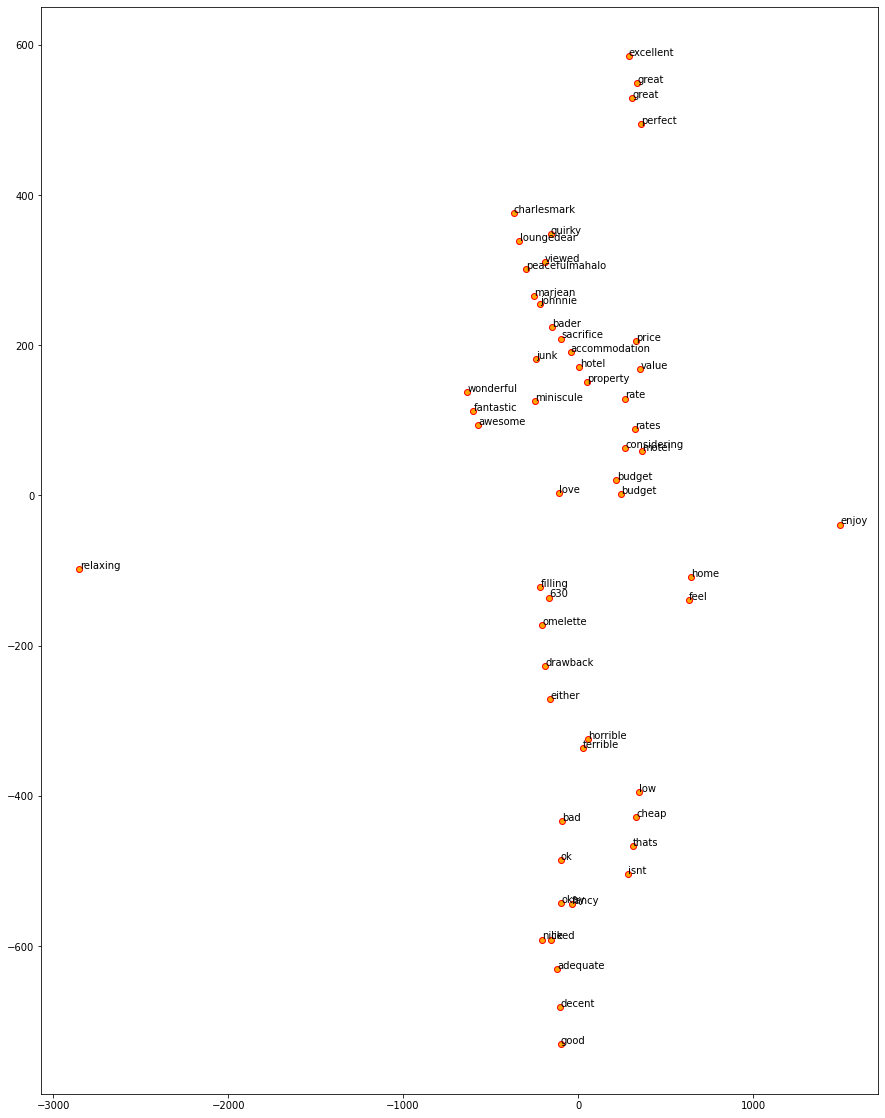

In [81]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 20))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [66]:
len(word_index.keys())


19663

In [67]:
len(word2vec.wv.vocab)


19663

In [68]:
max_length = 200 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 6000
validation_samples = 2933
data = pad_sequences(sequences, maxlen=max_length)

#labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)

Shape of data tensor: (9999, 200)
Shape of label tensor: (9999,)
Shape of training data:  (6000, 200)
Shape of validation data:  (2933, 200)


In [69]:

embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [70]:
embedding_matrix.shape


(19664, 100)

In [71]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          1966400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,606,465
Trainable params: 2,606,465
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [73]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.6201 - acc: 0.7227 - val_loss: 0.6045 - val_acc: 0.7419
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.5358 - acc: 0.7380 - val_loss: 0.6331 - val_acc: 0.7245
Epoch 3/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4455 - acc: 0.7802 - val_loss: 0.6854 - val_acc: 0.6887
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.3325 - acc: 0.8453 - val_loss: 0.7999 - val_acc: 0.6860
Epoch 5/10
188/188 [==============================] - 2s 9ms/step - loss: 0.2288 - acc: 0.9048 - val_loss: 0.9471 - val_acc: 0.6597
Epoch 6/10
188/188 [==============================] - 2s 9ms/step - loss: 0.1432 - acc: 0.9517 - val_loss: 1.1833 - val_acc: 0.6758
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0872 - acc: 0.9722 - val_loss: 1.3965 - val_acc: 0.6198
Epoch 8/10
188/188 [==============================] - 2s 10ms/step - loss: 

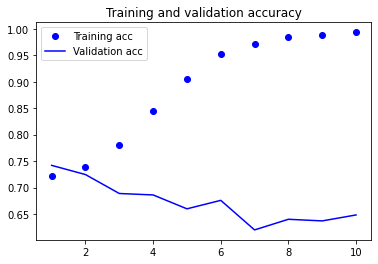

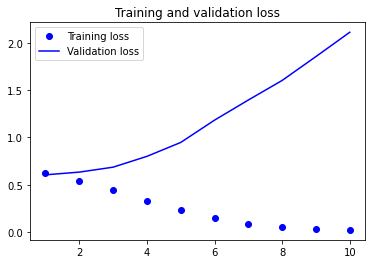

In [74]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()